In [1]:
%load_ext autoreload
%autoreload 2

## Visual descriptions

To simply get visual descriptions from LENS to pass on to an LLM, follow:

In [2]:
import requests
from lens import Lens, LensProcessor
from PIL import Image
import torch
img_url = 'https://images.unsplash.com/photo-1465056836041-7f43ac27dcb5?w=720'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
question = "What is the image about?"

lens = Lens()
processor = LensProcessor()
with torch.no_grad():
    samples = processor([raw_image],[question])
    output = lens(samples)

Let's print out the image to see what it was.

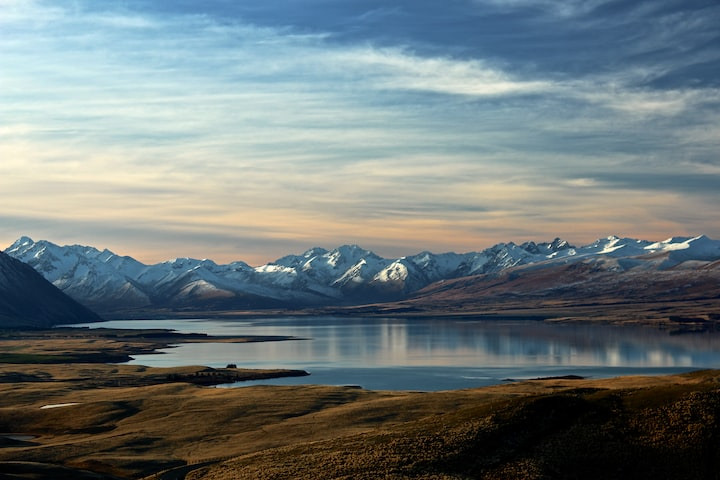

In [3]:
raw_image

Now, let's look at what the LENS vision modules output. Here, the output is wrapped in a VQA prompt that can be passed to a LLM.

In [4]:
print(output["prompts"])

['Tags:\n-Mountain range\n-Body of water\n-mountains\n-New zealand passport\n-Glacial lake\nAttributes:\n-lake which has large body of water surrounded by land\n-mountains which has snow-capped peaks\n-destination which has Natural features such as mountains, rivers, or lakes\n-place which has natural features like mountains, rivers, and lakes\n-scenery which has mountains, valleys, and hills\nCaptions:\n-the mountains and grass are in front of a body of water\n-a lake is surrounded by very beautiful mountains\n-some mountains reflected in a body of water\n-mountains line the horizon near a calm lake\n-view of a group of mountains from an open valley\n-mountains on the other side of lake in the country\n-a scenic landscape with mountains against a cloudy sky\n-a body of water surrounded by dry grass and mountains\n-there are snow capped mountains behind a lake in the mountains\n-a scenic view of a lake with some mountain range\nQuestion:What is the image about?\nShort Answer:']


## Passing the visual descriptions to a LLM
We can use the prompts and visual descriptions generated by LENS to get an LLM to solve problems about an image. Here, you see an LLM that uses the visual information to answer the VQA question posed in the prompt above.

In [5]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small",truncation_side = 'left',padding = True)
LLM_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small")

input_ids = tokenizer(samples["prompts"], return_tensors="pt").input_ids
outputs = LLM_model.generate(input_ids)
print(tokenizer.decode(outputs[0]))

<pad> mountain range</s>


/home/tristan_contextual_ai/miniconda3/envs/lens-release/lib/python3.9/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


## Advanced Usage
We might want to run a large dataset through LENS. Maybe it doesn't fit in memory. Not to worry! You can pass a huggingface dataset instead of a list into LENS as well. This function gives us the visual features and prompts too.

In [6]:
from datasets import load_dataset

lens = Lens()
processor = LensProcessor()
ds = load_dataset("llm-lens/lens_sample_test", split="test")   
output_ds = lens.hf_dataset_transform(ds, processor, return_global_caption = False)
print(output_ds)

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label', 'id', 'tags', 'attributes', 'intensive_captions'],
    num_rows: 10
})
